In [216]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/销售量按日期单品合并_剔除后.csv",encoding='utf-8')
print(df)

           销售日期  102900005115823   102900005115908   102900005115779   \
0      2020/7/1            11.476             8.959            41.966   
1      2020/7/2             6.806            14.275            44.873   
2      2020/7/3            13.120             8.173            36.309   
3      2020/7/4            28.186            13.034            51.205   
4      2020/7/5            12.038            10.791            34.249   
...         ...               ...               ...               ...   
1090  2023/6/26             1.420             0.000             7.971   
1091  2023/6/27             1.823             0.822             0.251   
1092  2023/6/28             5.553             2.701             0.000   
1093  2023/6/29             4.687             0.000             2.904   
1094  2023/6/30             7.036             0.000             0.000   

      102900005118824   102900005115984   102900005115762   102900005116714   \
0                4.119            32.579   

In [217]:
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品编码')

Epoch 1/30
725/725 - 2s - loss: 0.0170 - 2s/epoch - 3ms/step
Epoch 2/30
725/725 - 1s - loss: 0.0153 - 708ms/epoch - 977us/step
Epoch 3/30
725/725 - 1s - loss: 0.0152 - 675ms/epoch - 931us/step
Epoch 4/30
725/725 - 1s - loss: 0.0151 - 656ms/epoch - 905us/step
Epoch 5/30
725/725 - 1s - loss: 0.0150 - 628ms/epoch - 866us/step
Epoch 6/30
725/725 - 1s - loss: 0.0149 - 612ms/epoch - 844us/step
Epoch 7/30
725/725 - 1s - loss: 0.0148 - 608ms/epoch - 839us/step
Epoch 8/30
725/725 - 1s - loss: 0.0151 - 600ms/epoch - 828us/step
Epoch 9/30
725/725 - 1s - loss: 0.0147 - 628ms/epoch - 866us/step
Epoch 10/30
725/725 - 1s - loss: 0.0147 - 600ms/epoch - 828us/step
Epoch 11/30
725/725 - 1s - loss: 0.0148 - 598ms/epoch - 825us/step
Epoch 12/30
725/725 - 1s - loss: 0.0148 - 607ms/epoch - 837us/step
Epoch 13/30
725/725 - 1s - loss: 0.0147 - 601ms/epoch - 829us/step
Epoch 14/30
725/725 - 1s - loss: 0.0147 - 627ms/epoch - 865us/step
Epoch 15/30
725/725 - 1s - loss: 0.0147 - 592ms/epoch - 817us/step
Epoch 16/

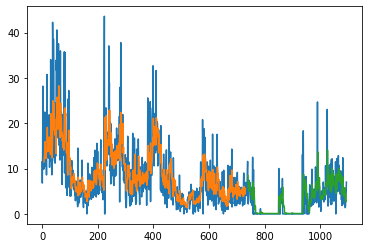

In [218]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = df[['销售日期','102900005115823 ']]
dataframe.set_index(["销售日期"], inplace=True)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(30, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [219]:
testFinal = dataset[-look_back:]
testFinal = [pd.DataFrame(testFinal).T.values.tolist()]
testFinalPredict = model.predict(testFinal)
testFinalPredict = scaler.inverse_transform(testFinalPredict)
print(testFinalPredict)

1/1 [==============================] - 0s 31ms/step
[[5.4688163]]


In [220]:
predict = pd.DataFrame([])
RMSE = pd.DataFrame([])
for index in df:
	if index == '销售日期':
		continue
	# load the dataset
	name_CN = pl.loc[index[:-1]]['单品名称']
	print(name_CN)
	dataframe = df[['销售日期',index]]
	dataframe.set_index(["销售日期"], inplace=True)
	dataset = dataframe.values
	dataset = dataset.astype('float32')
	# normalize the dataset
	scaler = MinMaxScaler(feature_range=(0, 1))
	dataset = scaler.fit_transform(dataset)
	# split into train and test sets
	train_size = int(len(dataset) * 0.99)
	test_size = len(dataset) - train_size
	train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
	# reshape into X=t and Y=t+1
	look_back = 7
	trainX, trainY = create_dataset(train, look_back)
	testX, testY = create_dataset(test, look_back)
	# reshape input to be [samples, time steps, features]
	trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
	testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
	# create and fit the LSTM network
	model = Sequential()
	model.add(LSTM(30, input_shape=(1, look_back)))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)
	# make predictions
	trainPredict = model.predict(trainX)
	testPredict = model.predict(testX)
	# invert predictions
	trainPredict = scaler.inverse_transform(trainPredict)
	trainY = scaler.inverse_transform([trainY])
	testPredict = scaler.inverse_transform(testPredict)
	testY = scaler.inverse_transform([testY])
	# calculate root mean squared error
	trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
	print('Train Score: %.2f RMSE' % (trainScore))
	testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
	print('Test Score: %.2f RMSE' % (testScore))
	RMSE[name_CN] = trainScore
	# shift train predictions for plotting
	trainPredictPlot = np.empty_like(dataset)
	trainPredictPlot[:, :] = np.nan
	trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
	# shift test predictions for plotting
	testPredictPlot = np.empty_like(dataset)
	testPredictPlot[:, :] = np.nan
	testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
	# plot baseline and predictions
	plt.plot(scaler.inverse_transform(dataset))
	plt.plot(trainPredictPlot)
	plt.plot(testPredictPlot)
	plt.show()

	testFinal = dataset[-look_back:]
	testFinal = [pd.DataFrame(testFinal).T.values.tolist()]
	testFinalPredict = model.predict(testFinal)
	testFinalPredict = scaler.inverse_transform(testFinalPredict)
	print(testFinalPredict)
	predict[name_CN] = testFinalPredict[0]

	print("--------------------------")

上海青
Epoch 1/30
1076/1076 - 2s - loss: 0.0133 - 2s/epoch - 2ms/step
Epoch 2/30
1076/1076 - 1s - loss: 0.0119 - 882ms/epoch - 819us/step
Epoch 3/30


KeyboardInterrupt: 

In [ ]:
print(RMSE)
print(predict)

In [ ]:
RMSE.to_csv('../data/销售量RMSE.csv',sep=',',encoding='utf_8_sig')
predict.to_csv('../data/销售量7月1日预估.csv',sep=',',encoding='utf_8_sig')